<a href="https://colab.research.google.com/github/DaJaCruz/PhD/blob/main/RNN_allpoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import packages

import tensorflow as tf
import pandas as pd # Pandas dataframe (very common in ML)
import numpy as np # import numpy to handle a lot of things!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM#, CuDNNLSTM
import matplotlib.pyplot as plt # import plotting tools to create figures
from IPython.display import display, Math # to print with Latex math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib import cm # to change colors of surface plots

# Uncomment line below if you want to enable live rotation of the surface plots.
#%matplotlib notebook


In [2]:
! sudo apt-get install texlive-latex-recommended 
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash 
!apt install cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lmodern fonts-noto-mono fonts-urw-base35
  libgs9 libgs9-common libidn11 libijs-0.35 libjbig2dec0 libkpathsea6
  libptexenc1 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  poppler-utils ghostscript fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum debhelper gv | postscript-viewer perl-tk xpdf
  | pdf-viewer xzdec texlive-latex-base-doc texlive-latex-recommended-doc
  texlive-luatex texlive-pstricks
The following NEW packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lmodern f

In [3]:
# Basic plotting tools needed in Python.

#%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
#plt.style.use("seaborn") # style for plotting that comes from seaborn
FS = 26  # Font Size
plt.rcParams['axes.facecolor'] = (0.97, 0.97, 0.97)
plt.rcParams['figure.facecolor'] = (1, 1, 1)
plt.rcParams["font.family"] = "sans"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams['font.size'] = FS
params = {"ytick.color": (0, 0, 0),
          "xtick.color": (0, 0, 0),
          "grid.color": (.9, .9, .9),
          "text.color": (0, 0, 0),
          "axes.labelcolor": (0, 0, 0),
          "axes.edgecolor": (.15, .15, .15),
          "text.usetex": True
          }
plt.rcParams.update(params)
linewidth=3.0

In [4]:
# import raw data
url = 'https://raw.githubusercontent.com/DaJaCruz/PhD/main/data91_all.csv'
df = pd.read_csv(url, delimiter=';')

In [ ]:

# Split raw data in Input (X) and Output (Y) data
X_data_raw = df.loc[:,['Input_4','Input_5']].values
Y_data_raw = df.loc[:,['Output_1', 'Output_3']].values

In [ ]:
#
#Scale Inputs with a [-1,1] scaler
scaler_x = MinMaxScaler(feature_range=(0,1))
#
# Scaling inputs with a Standard Scaler:
#scaler_x = StandardScaler()
#
scaler_x.fit(X_data_raw)# fit the scaler to the input data
#
X_data_raw_scaled=scaler_x.transform(X_data_raw) # scale the input data (the whole dataset)
#
#Scale Inputs with a [-1,1] scaler
scaler_y = MinMaxScaler(feature_range=(0,1))
#
# Scaling inputs with a Standard Scaler:
#scaler_y = StandardScaler()
#
_, idx = np.unique(Y_data_raw, axis=0, return_index=True)
Y_data_unique = Y_data_raw[np.sort(idx)]

scaler_y.fit(Y_data_unique) # fit the scaler to the output data
Y_data_unique_scaled=scaler_y.transform(Y_data_unique) # scale the output data (the whole dataset)


In [ ]:
# Reshape data 
X_data = X_data_raw.reshape((91, 500, 2))
X_data_scaled = X_data_raw_scaled.reshape((91, 500, 2))

Y_data = Y_data_unique.reshape((91, 2, 1))
Y_data_scaled = Y_data_unique_scaled.reshape((91, 2, 1))


Text(0.5, 1.0, 'Normalized output data')

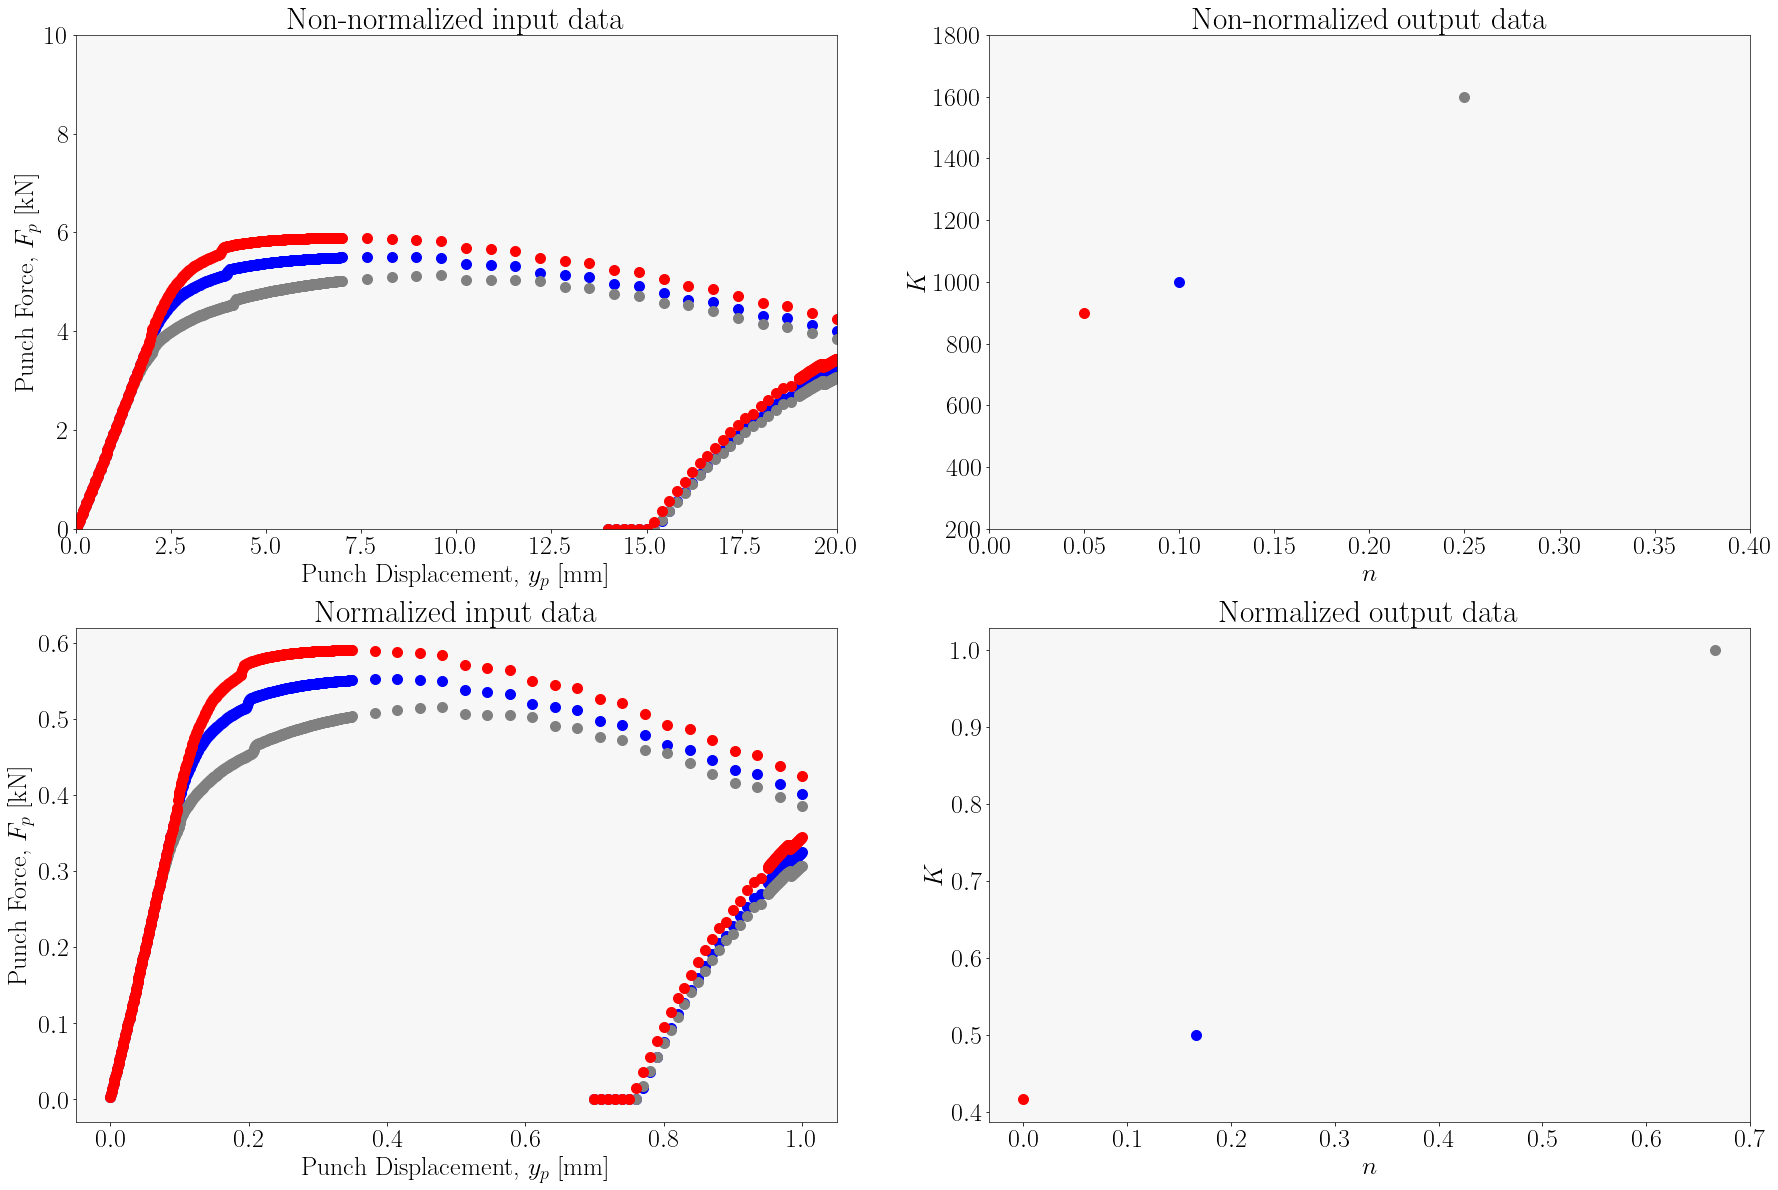

In [ ]:
#Plots with normalized and Non-normalized inputs
fig_ANN, ((ax1_ANN, ax2_ANN), (ax3_ANN, ax4_ANN)) = plt.subplots(nrows=2, ncols=2, figsize=(30, 20))

#Case Studies to represent
Case_1 = 0
Case_2 = 45
Case_3 = 90

#Force Displacement Curves
ax1_ANN.plot(X_data[Case_1,:,0], X_data[Case_1,:,1], 'o', markersize=10, color='blue', label="training points") # show Non-normalized training data
ax1_ANN.plot(X_data[Case_2,:,0], X_data[Case_2,:,1], 'o', markersize=10, color='gray', label="training points") # show Non-normalized training data
ax1_ANN.plot(X_data[Case_3,:,0], X_data[Case_3,:,1], 'o', markersize=10, color='red', label="training points") # show Non-normalized training data
ax1_ANN.set_ylabel('Punch Force, $F_p$ [kN]')
ax1_ANN.set_xlabel('Punch Displacement, $y_p$ [mm]')
ax1_ANN.set_title('Non-normalized input data')
#ax1_ANN.legen#d(['training', 'testing', 'validation' ], loc='best')
#ax1_ANN.grid(True, color='gray', linestyle='-')
ax1_ANN.set_ylim([0, 10])
ax1_ANN.set_xlim([0, 20])

# K-n Points
ax2_ANN.plot(Y_data[Case_1,1,:], Y_data[Case_1,0,:], 'o', markersize=10, color='blue') # show normalized training data
ax2_ANN.plot(Y_data[Case_2,1,:], Y_data[Case_2,0,:], 'o', markersize=10, color='gray') # show normalized training data
ax2_ANN.plot(Y_data[Case_3,1,:], Y_data[Case_3,0,:], 'o', markersize=10, color='red') # show normalized training data
ax2_ANN.set_ylabel('$K$')
ax2_ANN.set_xlabel('$n$')
ax2_ANN.set_title('Non-normalized output data')
# ax2_ANN.legend(['training', 'testing', 'validation'], loc='upper right')
#ax1_ANN.grid(True, color='gray', linestyle='-')
ax2_ANN.set_ylim([200, 1800])
ax2_ANN.set_xlim([0, 0.4])

ax3_ANN.plot(X_data_scaled[Case_1,:,0], X_data_scaled[Case_1,:,1], 'o', markersize=10, color='blue', label="training points") # show Non-normalized training data
ax3_ANN.plot(X_data_scaled[Case_2,:,0], X_data_scaled[Case_2,:,1], 'o', markersize=10, color='gray', label="training points") # show Non-normalized training data
ax3_ANN.plot(X_data_scaled[Case_3,:,0], X_data_scaled[Case_3,:,1], 'o', markersize=10, color='red', label="training points") # show Non-normalized training data
ax3_ANN.set_ylabel('Punch Force, $F_p$ [kN]')
ax3_ANN.set_xlabel('Punch Displacement, $y_p$ [mm]')
ax3_ANN.set_title('Normalized input data')
#ax1_ANN.legen#d(['training', 'testing', 'validation' ], loc='best')
#ax1_ANN.grid(True, color='gray', linestyle='-')
# ax3_ANN.set_ylim([-1, 1])
# ax3_ANN.set_xlim([-1, 1])

# K-n Points
ax4_ANN.plot(Y_data_scaled[Case_1,1,:], Y_data_scaled[Case_1,0,:], 'o', markersize=10, color='blue') # show normalized training data
ax4_ANN.plot(Y_data_scaled[Case_2,1,:], Y_data_scaled[Case_2,0,:], 'o', markersize=10, color='gray') # show normalized training data
ax4_ANN.plot(Y_data_scaled[Case_3,1,:], Y_data_scaled[Case_3,0,:], 'o', markersize=10, color='red') # show normalized training data
ax4_ANN.set_ylabel('$K$')
ax4_ANN.set_xlabel('$n$')
ax4_ANN.set_title('Normalized output data')
# ax2_ANN.legend(['training', 'testing', 'validation'], loc='upper right')
#ax1_ANN.grid(True, color='gray', linestyle='-')
# ax4_ANN.set_ylim([-1.25, 1.25])
# ax4_ANN.set_xlim([-1.25, 1.25])


# Create figure with specified size
# fig_ANN.set_size_inches(22, 10)

In [ ]:
# Divide datasets into train and test 

seed = 1000 # set a random seed to replicate results
np.random.seed(seed)

testvalset_ratio = 0.4 # ratio of test set points from the dataset

X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(X_data_scaled, Y_data_scaled,
                                                    test_size=testvalset_ratio,random_state=seed
                                                    )

print(X_train_scaled)

[[[0.         0.00371188]
  [0.00095095 0.00732343]
  [0.00195195 0.01053371]
  ...
  [0.71971972 0.        ]
  [0.70970971 0.        ]
  [0.6996997  0.        ]]

 [[0.         0.00371188]
  [0.00095095 0.00732343]
  [0.00195195 0.01053371]
  ...
  [0.71971972 0.29755217]
  [0.70970971 0.27678571]
  [0.6996997  0.25541734]]

 [[0.         0.00371188]
  [0.00095095 0.00732343]
  [0.00195195 0.01053371]
  ...
  [0.71971972 0.        ]
  [0.70970971 0.        ]
  [0.6996997  0.        ]]

 ...

 [[0.         0.00371188]
  [0.00095095 0.00732343]
  [0.00195195 0.01053371]
  ...
  [0.71971972 0.        ]
  [0.70970971 0.        ]
  [0.6996997  0.        ]]

 [[0.         0.00371188]
  [0.00095095 0.00732343]
  [0.00195195 0.01053371]
  ...
  [0.71971972 0.        ]
  [0.70970971 0.        ]
  [0.6996997  0.        ]]

 [[0.         0.00371188]
  [0.00095095 0.00732343]
  [0.00195195 0.01053371]
  ...
  [0.71971972 0.        ]
  [0.70970971 0.        ]
  [0.6996997  0.        ]]]


Text(0.5, 1.0, 'Normalized output data')

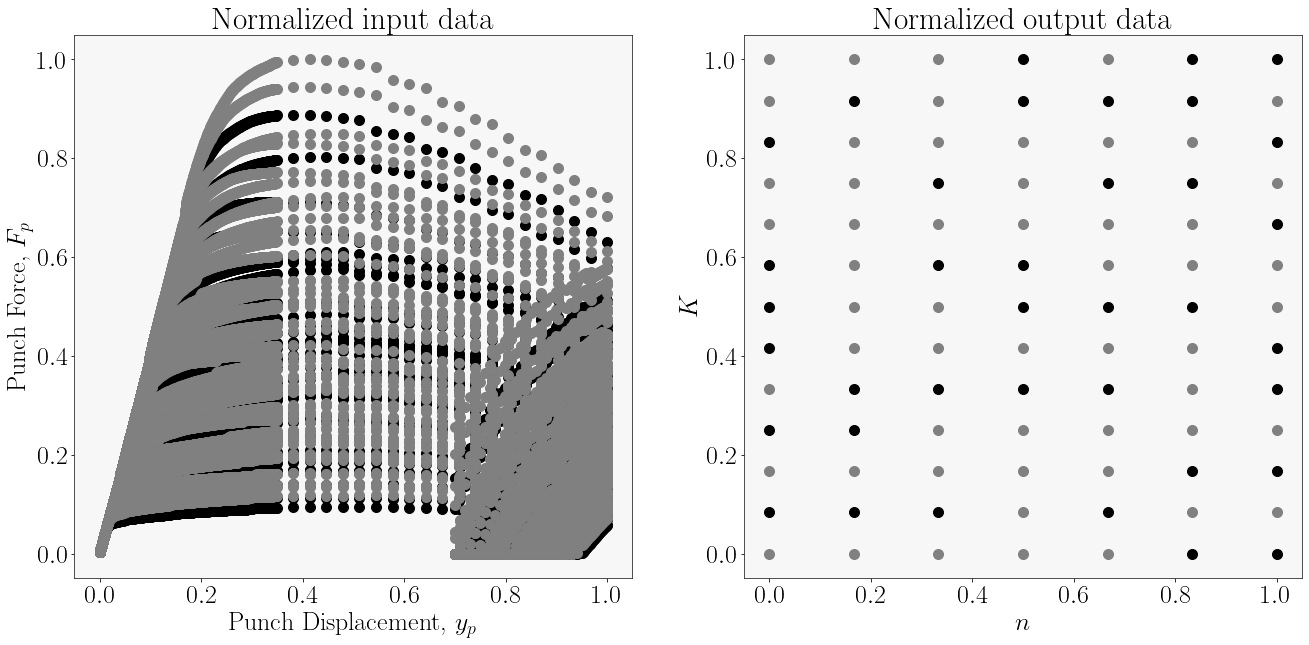

In [ ]:
#Plots with normalized and Non-normalized outputs
fig_ANN, (ax1_ANN, ax2_ANN) = plt.subplots(1,2)

ax1_ANN.plot(X_test_scaled[:,:,0], X_test_scaled[:,:,1], 'o', markersize=10, color='black', label="testing points") # show normalized training data
ax1_ANN.plot(X_train_scaled[:,:,0], X_train_scaled[:,:,1], 'o', markersize=10, color='gray', label="training points") # show normalized training data
ax1_ANN.set_ylabel('Punch Force, $F_p$')
ax1_ANN.set_xlabel('Punch Displacement, $y_p$')
ax1_ANN.set_title('Normalized input data')
# ax1_ANN.legend(['training', 'testing', 'validation'], loc='upper right')
#ax1_ANN.grid(True, color='gray', linestyle='-')
# ax1_ANN.set_ylim([-1.25, 1.25])
# ax1_ANN.set_xlim([-1.25, 1.25])
# Create figure with specified size
fig_ANN.set_size_inches(22, 10)

# K-n Points
ax2_ANN.plot(Y_train_scaled[:,1,:], Y_train_scaled[:,0,:], 'o', markersize=10, color='gray') # show normalized training data
ax2_ANN.plot(Y_test_scaled[:,1,:], Y_test_scaled[:,0,:], 'o', markersize=10, color='black', label="testing points") # show normalized training data
ax2_ANN.set_ylabel('$K$')
ax2_ANN.set_xlabel('$n$')
ax2_ANN.set_title('Normalized output data')
# ax2_ANN.legend(['training', 'testing', 'validation'], loc='upper right')
#ax1_ANN.grid(True, color='gray', linestyle='-')
# ax2_ANN.set_ylim([-1.25, 1.25])
# ax2_ANN.set_xlim([-1.25, 1.25])


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(20, input_shape=(500, 2)))#, activation='relu', return_sequences=True
model.add(Dropout(0.2))
# model.add(LSTM(128))
# model.add(Dropout(0.2))
# model.add(Dense(32))
# model.add(Dropout(0.2))
model.add(Dense(2))


In [ ]:
# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error',
              optimizer=opt)
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 20)                1840      
                                                                 
 dropout_10 (Dropout)        (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 2)                 42        
                                                                 
Total params: 1,882
Trainable params: 1,882
Non-trainable params: 0
_________________________________________________________________


54


In [ ]:

# Train the model
history = model.fit(X_train_scaled, Y_train_scaled, validation_data=(X_test_scaled, Y_test_scaled), epochs=1000, batch_size=500)


Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.2560 - val_loss: 0.1591
Epoch 2/1000
1/1 [==============================] - 0s 65ms/step - loss: 0.1340 - val_loss: 0.1125
Epoch 3/1000
1/1 [==============================] - 0s 64ms/step - loss: 0.1325 - val_loss: 0.1178
Epoch 4/1000
1/1 [==============================] - 0s 71ms/step - loss: 0.1228 - val_loss: 0.1137
Epoch 5/1000
1/1 [==============================] - 0s 64ms/step - loss: 0.1104 - val_loss: 0.1131
Epoch 6/1000
1/1 [==============================] - 0s 65ms/step - loss: 0.1002 - val_loss: 0.1192
Epoch 7/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.1016 - val_loss: 0.1232
Epoch 8/1000
1/1 [==============================] - 0s 62ms/step - loss: 0.1020 - val_loss: 0.1213
Epoch 9/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.1083 - val_loss: 0.1169
Epoch 10/1000
1/1 [==============================] - 0s 62ms/step - loss: 0.1039 - val_loss: 0.1117
Epoch 11/10

In [ ]:
last_output = model.predict(X_test_scaled)
print(last_output)

2/2 [==============================] - 0s 11ms/step
[[0.53232044 0.55517143]
 [0.3860246  0.6205225 ]
 [0.0726327  0.95067   ]
 [0.34367728 0.6186935 ]
 [0.05971327 0.7411336 ]
 [0.11160493 0.6665792 ]
 [0.8621666  0.12558115]
 [0.45652694 0.608348  ]
 [0.0917207  1.0356866 ]
 [0.7065529  0.30066216]
 [0.5312308  0.5570697 ]
 [0.585372   0.48295245]
 [0.6447027  0.38591173]
 [0.18666518 0.59673417]
 [0.4878321  0.5938107 ]
 [0.23154536 0.60164386]
 [0.90594053 0.07648653]
 [0.5907014  0.473026  ]
 [0.6895316  0.32087117]
 [0.608219   0.44555047]
 [0.5980844  0.46058473]
 [0.45580268 0.608877  ]
 [0.1161176  0.6593301 ]
 [0.71292883 0.292992  ]
 [0.39509916 0.6202802 ]
 [0.48787957 0.5935363 ]
 [0.3521502  0.61935854]
 [0.5415299  0.5443112 ]
 [0.7316616  0.2717883 ]
 [0.59232455 0.4710386 ]
 [0.73282933 0.27084416]
 [0.7758197  0.22439429]
 [0.5576131  0.5238981 ]
 [0.5462674  0.53963506]
 [0.64928603 0.37811643]
 [0.5935023  0.46943647]
 [0.14222518 0.61319745]]


(0.0, 1.0)

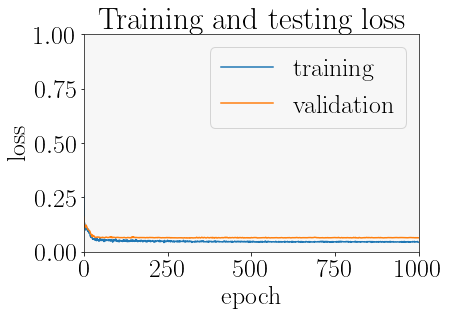

In [ ]:
fig_ANN, (ax1_ANN) = plt.subplots(1,1)

ax1_ANN.plot(history.history['loss'])
ax1_ANN.plot(history.history['val_loss'])
ax1_ANN.set_title('Training and testing loss')
ax1_ANN.set_ylabel('loss')
ax1_ANN.set_xlabel('epoch')
ax1_ANN.legend(['training', 'validation'], loc='upper right')
#ax1_ANN.grid(True, color='gray', linestyle='-')
ax1_ANN.set_xlim([0, 1000])
ax1_ANN.set_ylim([0, 1])

In [ ]:
Y_data_ANNpred_scaled = history.model.predict(X_data_scaled)
Y_data_ANNpred = scaler_y.inverse_transform(Y_data_ANNpred_scaled)
Y_data_ANNpred_scaled = Y_data_ANNpred_scaled.reshape(91,2,1)
Y_data_ANNpred = Y_data_ANNpred.reshape(91,2,1)


3/3 [==============================] - 0s 11ms/step


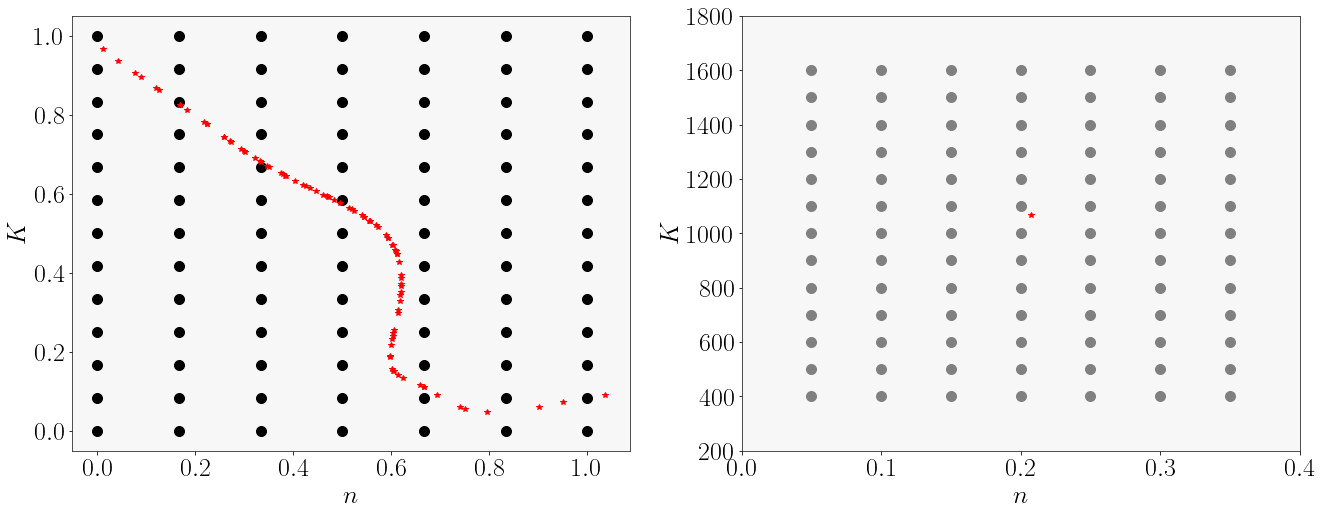

In [ ]:
fig_ANN, (ax1_ANN, ax2_ANN) = plt.subplots(1,2)

ax1_ANN.plot(Y_data_scaled[:,1,:], Y_data_scaled[:,0,:], 'o', markersize=10, color='black', label="testing points") # show training data
ax1_ANN.plot(Y_data_ANNpred_scaled[:,1], Y_data_ANNpred_scaled[:,0], marker='*', linestyle='none', color='red', label="Neural Network prediction") # plot prediction
ax1_ANN.set_ylabel('$K$')
ax1_ANN.set_xlabel('$n$')

ax2_ANN.plot(Y_data[:,1,:], Y_data[:,0,:], 'o', markersize=10, color='gray', label="training points") # show training data
ax2_ANN.plot(Y_data_ANNpred[2,1], Y_data_ANNpred[2,0], marker='*', linestyle='none', color='red', label="Neural Network prediction") # plot prediction
ax2_ANN.set_ylabel('$K$')
ax2_ANN.set_xlabel('$n$')
# ax2_ANN.legend(loc='best')
ax2_ANN.set_xlim([0, 0.4])
ax2_ANN.set_ylim([200, 1800])
#ax2_ANN.grid(True, color='gray', linestyle='-')
# Create figure with specified size
fig_ANN.set_size_inches(22, 8)